In [43]:
import os
import numpy as np
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

/home/jiaxuan/venv/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


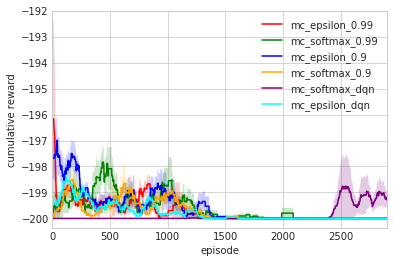

In [45]:
smooth = 100

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def running_prob(x, N):
    prob = (np.array(x) > -200)
    cumsum = np.cumsum(np.insert(prob, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# combined result
def combined_reward(logdirs, num_limit=2500, 
                    colors=['r', 'g', 'b', 
                            'orange', 'purple', 'cyan'], 
                    smooth=smooth, prob=False):
    smoothing_f = running_prob if prob else running_mean
    ylabel = "success probability" if prob else "cumulative rewards"
    for i, logdir in enumerate(logdirs):
        mode = 'dqn' if 'dqn' in logdir else 'dora'
        data = []
        for fn in os.listdir(logdir):
            if not fn.startswith(mode):
                continue
            rewards = joblib.load(os.path.join(logdir, fn))
            rewards = smoothing_f(rewards, smooth)
            if len(rewards) < num_limit: continue
            data.append(rewards)

        # align by the min amount 
        min_len = min([len(d) for d in data])
        data = [d[:min_len] for d in data]
        data = np.vstack(data)

        label = '{}'.format(logdir)
        sns.tsplot(data, condition=label, color=colors[i % len(colors)])
    plt.xlabel('episode')
    plt.ylabel('cumulative reward')
    plt.legend()

logdirs = ['mc_epsilon_0.99', 'mc_softmax_0.99',  
           'mc_epsilon_0.9', 'mc_softmax_0.9',
           'mc_softmax_dqn', 'mc_epsilon_dqn'
            ]
combined_reward(logdirs, prob=False)
plt.savefig('mountain_car_rewards.png')
plt.show()

/home/jiaxuan/venv/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


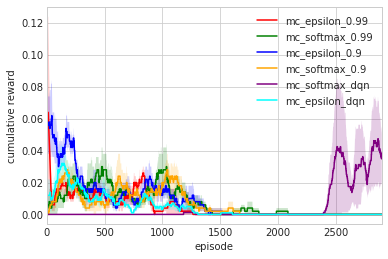

In [46]:
combined_reward(logdirs, prob=True)
plt.savefig('mountain_car_prob.png')
plt.show()

In [89]:
c = joblib.load('logs/counter_dora_default.pkl')

(10, 3) [[0.5, 0.99733497500419621]]


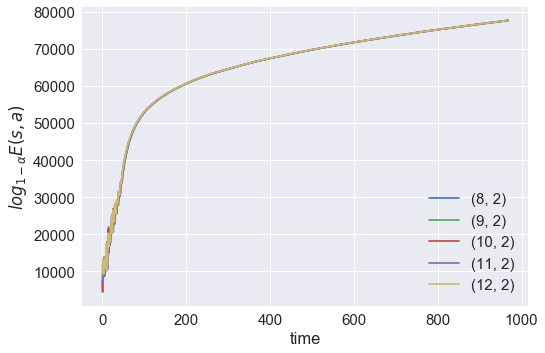

In [91]:
import math
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

def math_log(a, base):
    return list(map(lambda x: math.log(x, base), a))
for k, v in c.items():
    if len(v) <= 1:
        print(k, v)
        continue
        
    Es = list(map(lambda a: a[0], c[k]))
    plt.plot(math_log(Es, 1-1e-4), label="%s" % str(k))

plt.legend()
plt.ylabel(r'$log_{1-\alpha} E(s, a)$')
plt.xlabel('time')
plt.savefig('dora_on_bridge_counter1.png')
plt.show()

(10, 3) [[0.5, 0.99733497500419621]]


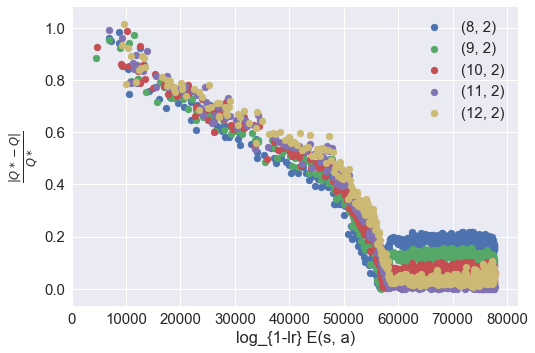

In [92]:
import math
sns.set_style("whitegrid")

def math_log(a, base):
    return list(map(lambda x: math.log(x, base), a))
for k, v in c.items():
    if len(v) <= 1:
        print(k, v)
        continue
    Es = list(map(lambda a: a[0], c[k]))
    qdiff = list(map(lambda a: a[1], c[k]))
    
    plt.scatter(math_log(Es, 1-1e-4), qdiff, label="%s" % str(k))

plt.legend()
plt.xlabel('log_{1-lr} E(s, a)')
plt.ylabel(r'$\frac{|Q*-Q|}{Q*}$')
plt.savefig('dora_on_bridge_counter2.png')
plt.show()